In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [112]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
data = pd.read_csv("fake_or_real_news.csv")

In [114]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters
    text = re.sub(r'\W', ' ', text)

    # # Tokenization
    # words = word_tokenize(text)

    # # Removing Stop Words and Applying Stemming
    # stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]

    # # Joining Words
    # text = ' '.join(words)
    
    return text


In [115]:
# Assuming 'data' is your DataFrame and 'text' is the column with news articles
# data['text'] = data['text'].apply(preprocess_text)


In [116]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [117]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [118]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [119]:
# vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
vectorizer = TfidfVectorizer(stop_words='english', 
                             max_df=0.7,  # terms that appear in more than 70% of documents are ignored
                             min_df=3,    # terms that appear in less than 3 documents are ignored
                             ngram_range=(1, 3))  # unigrams and bigrams are considered
X_train_vectorized = vectorizer.fit_transform(X_train) 
X_test_vectorized = vectorizer.transform(X_test)

In [120]:
model_scores = {}

In [121]:
def draw_confuion_matrix(title, cmap_choice, score, actual,predictions):
    # Generate the confusion matrix
    cm = confusion_matrix(actual, predictions)

    # # List of available color maps
    # color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 
    #               'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    #               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    #               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

    # # Randomly choose a color map
    # cmap_choice = random.choice(color_maps)

    score = round(score*100,1)
    title = 'Confusion Matrix - '+title+ ": " +str(score)+ "%"
    
    # Plotting using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap_choice, xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()


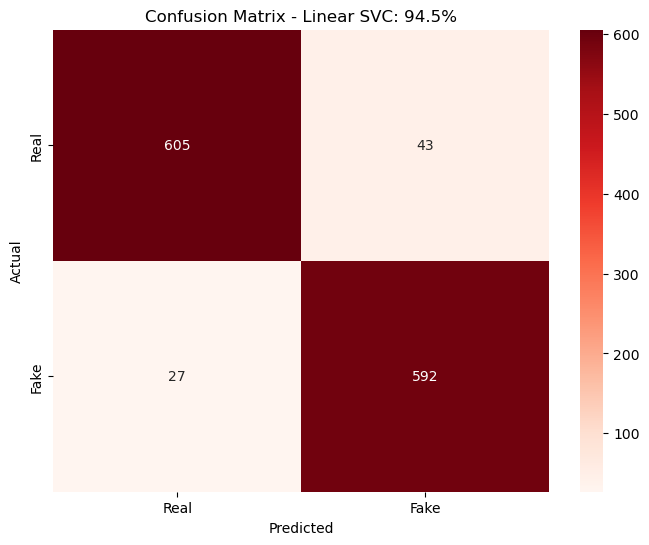

In [122]:
svc_clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
svc_clf.fit(X_train_vectorized, y_train)
svc_score= svc_clf.score(X_test_vectorized, y_test)
model_scores["Linear SVC"] = svc_score
predictions = svc_clf.predict(X_test_vectorized)
draw_confuion_matrix("Linear SVC",'Reds',svc_score, y_test,predictions)

In [123]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential()
# model.add(Dense(10, activation='relu', input_dim=X_train_vectorized.shape[1]))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train_vectorized, y_train, epochs=5, batch_size=8)
# nn_accuracy = model.evaluate(X_test_vectorized, y_test, verbose=0)[1]
# predictions = model.predict(X_test_vectorized)
# draw_confuion_matrix("Neural Network",'Blues',y_test,predictions)



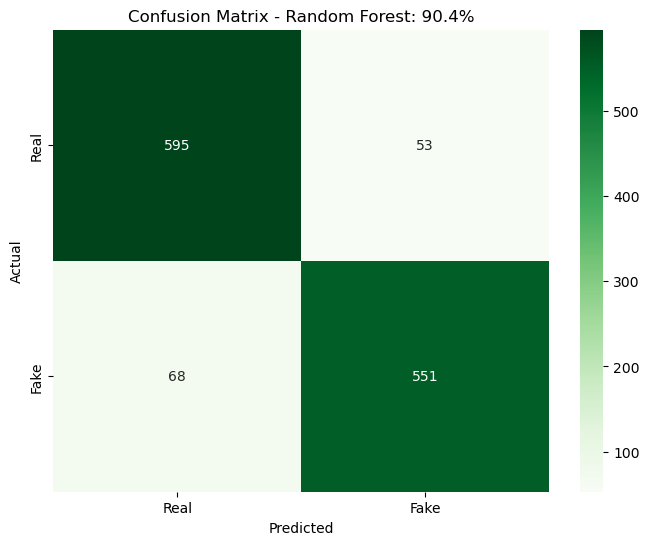

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_vectorized, y_train)
rf_score = rf_clf.score(X_test_vectorized, y_test)
model_scores["Random Forest"] = rf_score
predictions = rf_clf.predict(X_test_vectorized)
draw_confuion_matrix("Random Forest",'Greens',rf_score, y_test,predictions)

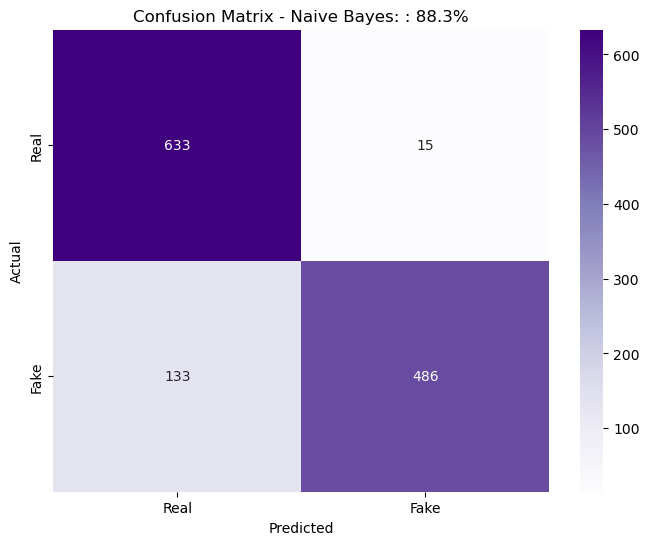

In [125]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(X_train_vectorized, y_train)
nb_score= nb_clf.score(X_test_vectorized, y_test)
model_scores["Naive Bayes"] = nb_score
predictions = nb_clf.predict(X_test_vectorized)
draw_confuion_matrix("Naive Bayes: ",'Purples',nb_score,y_test,predictions)

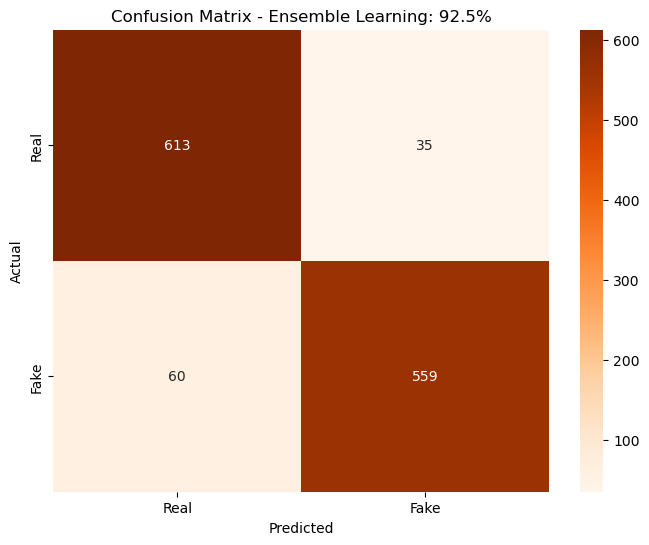

In [126]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples for the estimators
estimators = [('naive_bayes', nb_clf), ('random_forest', rf_clf), ('svm', svc_clf)]
# Create the ensemble model
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train_vectorized, y_train)
ensemble_score = ensemble.score(X_test_vectorized, y_test)
model_scores["Ensemble Learning"] = ensemble_score
predictions = ensemble.predict(X_test_vectorized)
draw_confuion_matrix("Ensemble Learning",'Oranges',ensemble_score, y_test,predictions)

In [133]:
model_scores

{'Linear SVC': 0.9447513812154696,
 'Random Forest': 0.904498816101026,
 'Naive Bayes': 0.8831886345698501,
 'Ensemble Learning': 0.9250197316495659}

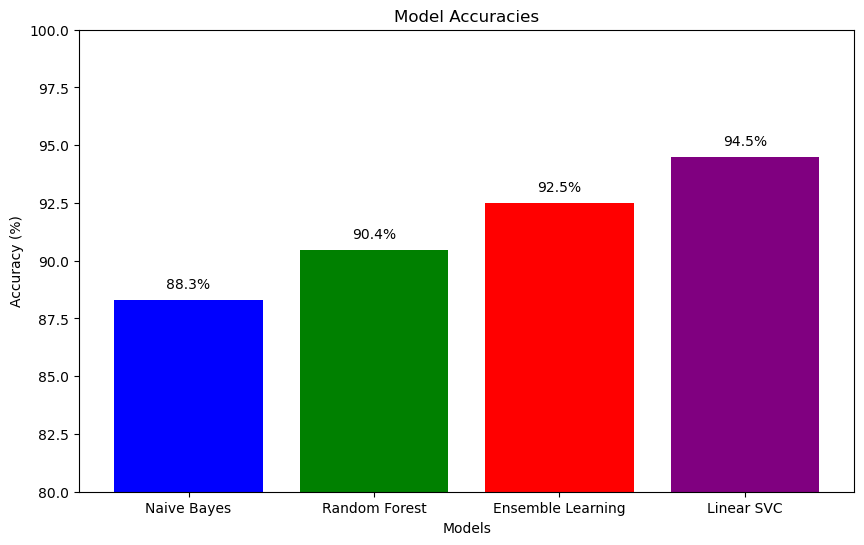

In [142]:
import matplotlib.pyplot as plt

# Your dictionary of model accuracies
model_accuracies = {
    'Linear SVC': 0.9447513812154696,
    'Random Forest': 0.904498816101026,
    'Naive Bayes': 0.8831886345698501,
    'Ensemble Learning': 0.9250197316495659
}

# Sort the dictionary by accuracies
sorted_accuracies = dict(sorted(model_accuracies.items(), key=lambda item: item[1]))

# Names of models
models = sorted_accuracies.keys()

# Accuracy values multiplied by 100 for percentage
accuracies = [accuracy * 100 for accuracy in sorted_accuracies.values()]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim([80, 100])  # Adjust y-axis limits for percentage

# Optional: Adding the percentage on top of each bar
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.5, f'{accuracies[i]:.1f}%', ha='center')

# Show the plot
plt.show()



In [127]:
# article_text = X_test.iloc[10]
# vectorized_text = vectorizer.transform([article_text])

In [128]:
# # Generate a random index within the range of X_test
# random_index = random.randint(0, len(X_test) - 1)

# # Select a random article using the generated index
# article_text = X_test.iloc[random_index]
# vectorized_text = vectorizer.transform([article_text])

# # Predict
# predicted_value = clf.predict(vectorized_text)[0]

# # Actual value
# actual_value = y_test.iloc[random_index]

# # Comparison and output
# if predicted_value == actual_value:
#     print("The answer is correct.")
# else:
#     print("The answer is incorrect.")



In [129]:
# # Predict for the entire test set
# predictions = clf.predict(X_test_vectorized)

# # Convert predictions and actual labels to arrays for easier comparison
# predictions_array = np.array(predictions)
# actual_labels_array = y_test.to_numpy()

# # Find indices where predictions and actual labels differ
# mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

# # Print each mismatch with its index
# for index in mismatch_indices:
#     print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
#     print(f"Text: {X_test.iloc[index]}\n")


In [130]:
# # Predict for the entire test set
# predictions = clf.predict(X_test_vectorized)

# # Convert predictions and actual labels to arrays for easier comparison
# predictions_array = np.array(predictions)
# actual_labels_array = y_test.to_numpy()

# # Initialize lists for false negatives and false positives
# false_negatives = []
# false_positives = []

# # Iterate over the predictions and actual labels
# for i in range(len(predictions_array)):
#     if predictions_array[i] == 0 and actual_labels_array[i] == 1:
#         # False Negative
#         false_negatives.append(i)
#     elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
#         # False Positive
#         false_positives.append(i)

In [131]:
# # Print False Negatives
# print("False Negatives: ACTUALLY FAKE")
# for index in false_negatives:
#     print(f"Index: {index}, Text: {X_test.iloc[index]}")
#     print()
#     print()
#     print()
    

In [132]:
# # Print False Positives
# print("\nFalse Positives: ACTUALLY REAL")
# for index in false_positives:
#     print(f"Index: {index}, Text: {X_test.iloc[index]}")
#     print()
#     print()
#     print()